In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

In [38]:
dataset_path = r'E:\1_RecSys\Recommender\data\collaborative\v2\1_movielens_dataset.csv'
dataset = pd.read_csv(dataset_path)

In [12]:
print(dataset.head())

   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  imdbId   tmdbId  
0  Adventure|Animation|Children|Comedy|Fantasy  114709    862.0  
1                               Comedy|Romance  113228  15602.0  
2                        Action|Crime|Thriller  113277    949.0  
3                             Mystery|Thriller  114369    807.0  
4                       Crime|Mystery|Thriller  114814    629.0  


In [14]:
# print(dataset.info())
print(dataset.describe())

              userId        movieId         rating     timestamp  \
count  100836.000000  100836.000000  100836.000000  1.008360e+05   
mean      326.127564   19435.295718       3.501557  1.205946e+09   
std       182.618491   35530.987199       1.042529  2.162610e+08   
min         1.000000       1.000000       0.500000  8.281246e+08   
25%       177.000000    1199.000000       3.000000  1.019124e+09   
50%       325.000000    2991.000000       3.500000  1.186087e+09   
75%       477.000000    8122.000000       4.000000  1.435994e+09   
max       610.000000  193609.000000       5.000000  1.537799e+09   

             imdbId         tmdbId  
count  1.008360e+05  100823.000000  
mean   3.515475e+05   20105.462633  
std    6.220602e+05   53274.143620  
min    4.170000e+02       2.000000  
25%    9.968500e+04     712.000000  
50%    1.187690e+05    6957.000000  
75%    3.149790e+05   11635.000000  
max    8.391976e+06  525662.000000  


In [20]:
print(f'Unique movie IDs= {dataset["movieId"].nunique()}')
print(f'Unique user IDs= {dataset["userId"].nunique()}')
print(f'Unique genres= {dataset["genres"].nunique()}')
print(f'Unique ratings= {dataset["rating"].nunique()}')
print(f'Unique timestamps= {dataset["timestamp"].nunique()}')
print(f'Unique titles= {dataset["title"].nunique()}')
print(f'Unique TMDB IDs= {dataset["tmdbId"].nunique()}')

Unique movie IDs= 9724
Unique user IDs= 610
Unique genres= 951
Unique ratings= 10
Unique timestamps= 85043
Unique titles= 9719
Unique TMDB IDs= 9715


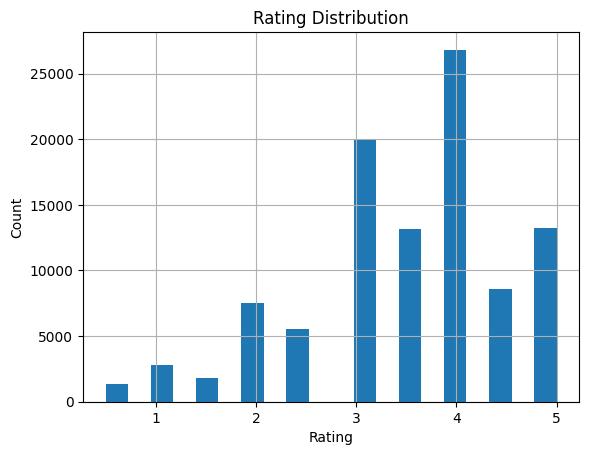

In [40]:
dataset['rating'].hist(bins=20)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

Number of Ratings per User (Top 10):
userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
Name: rating, dtype: int64
Average number of ratings per user: 165.30


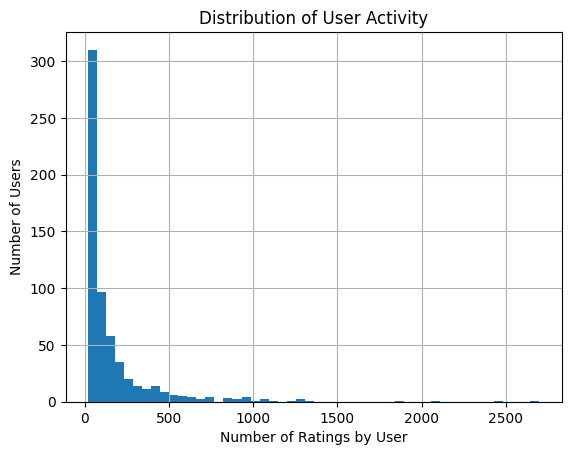

In [ ]:
ratings_per_user = dataset.groupby('userId')['rating'].count().sort_values(ascending=False)
print("Number of Ratings per User (Top 10):")
print(ratings_per_user.head(10))
print(f"Average number of ratings per user: {ratings_per_user.mean():.2f}")

ratings_per_user.hist(bins=50)
plt.xlabel("Number of Ratings by User")
plt.ylabel("Number of Users")
plt.title("Distribution of User Activity")
plt.show()

Average Rating Given by Users (Top 10 Highest):
userId
53     5.000000
251    4.869565
515    4.846154
25     4.807692
30     4.735294
523    4.693333
348    4.672727
171    4.634146
452    4.556931
43     4.552632
Name: rating, dtype: float64
Average rating given by all users: 3.66


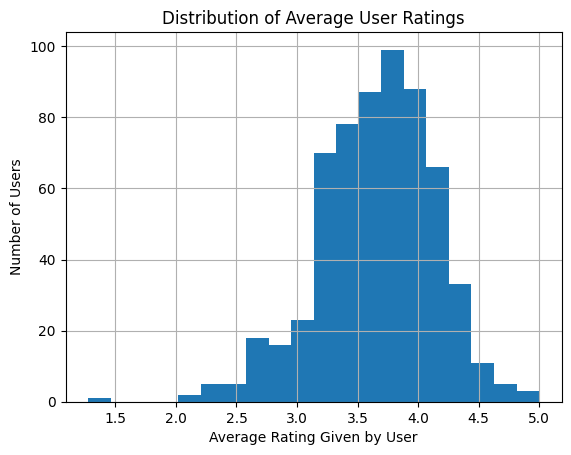

In [44]:
average_rating_per_user = dataset.groupby('userId')['rating'].mean().sort_values(ascending=False)
print("Average Rating Given by Users (Top 10 Highest):")
print(average_rating_per_user.head(10))
print(f"Average rating given by all users: {average_rating_per_user.mean():.2f}")

average_rating_per_user.hist(bins=20)
plt.xlabel("Average Rating Given by User")
plt.ylabel("Number of Users")
plt.title("Distribution of Average User Ratings")
plt.show()

In [31]:
print(dataset.isnull().sum())

userId        0
movieId       0
rating        0
timestamp     0
title         0
genres        0
imdbId        0
tmdbId       13
dtype: int64


In [32]:
average_ratings = dataset.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
print("Top 10 Highest Rated Movies (Average):")
print(average_ratings)

Top 10 Highest Rated Movies (Average):
title
Karlson Returns (1970)                                                         5.0
Zeitgeist: Moving Forward (2011)                                               5.0
Dream of Light (a.k.a. Quince Tree Sun, The) (Sol del membrillo, El) (1992)    5.0
Dragons: Gift of the Night Fury (2011)                                         5.0
12 Angry Men (1997)                                                            5.0
Justice League: Doom (2012)                                                    5.0
Junior and Karlson (1968)                                                      5.0
Jump In! (2007)                                                                5.0
Human Condition III, The (Ningen no joken III) (1961)                          5.0
Louis Theroux: Law & Disorder (2008)                                           5.0
Name: rating, dtype: float64


In [34]:
rating_counts = dataset.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
print("Top 10 Most Rated Movies (Number of Ratings):")
print(rating_counts)

Top 10 Most Rated Movies (Number of Ratings):
title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64


In [48]:
# First, we need to split the genres string into individual genres
dataset['individual_genres'] = dataset['genres'].str.split('|')
genre_df = dataset.explode('individual_genres')
average_ratings_per_genre = genre_df.groupby('individual_genres')['rating'].mean().sort_values(ascending=False)
print("Average Rating per Genre:")
print(average_ratings_per_genre)

Average Rating per Genre:
individual_genres
Film-Noir             3.920115
War                   3.808294
Documentary           3.797785
Crime                 3.658294
Drama                 3.656184
Mystery               3.632460
Animation             3.629937
IMAX                  3.618335
Western               3.583938
Musical               3.563678
Adventure             3.508609
Romance               3.506511
Thriller              3.493706
Fantasy               3.491001
(no genres listed)    3.489362
Sci-Fi                3.455721
Action                3.447984
Children              3.412956
Comedy                3.384721
Horror                3.258195
Name: rating, dtype: float64


In [47]:
genre_counts = genre_df['individual_genres'].value_counts().sort_values(ascending=False)
print("Most Popular Genres:")
print(genre_counts)

Most Popular Genres:
individual_genres
Drama                 41928
Comedy                39053
Action                30635
Thriller              26452
Adventure             24161
Romance               18124
Sci-Fi                17243
Crime                 16681
Fantasy               11834
Children               9208
Mystery                7674
Horror                 7291
Animation              6988
War                    4859
IMAX                   4145
Musical                4138
Western                1930
Documentary            1219
Film-Noir               870
(no genres listed)       47
Name: count, dtype: int64


Number of Ratings per Year:
year
1996     6040
1997     1916
1998      507
1999     2439
2000    10061
2001     3922
2002     3478
2003     4014
2004     3279
2005     5813
2006     4059
2007     7114
2008     4351
2009     4158
2010     2301
2011     1690
2012     4656
2013     1664
2014     1439
2015     6616
2016     6703
2017     8198
2018     6418
Name: count, dtype: int64

Number of Ratings per Month and Year:
month    1     2     3     4     5     6     7     8     9    10    11   12
year                                                                       
1996      0     0    58   165   832   883   489  1010   384  935   978  306
1997    250   323   398   219   303    84    70     0   236    1     4   28
1998     57     1   130     0    32    43   113   119     0    1     4    7
1999      4    32     7     0    36     3     4     3     1  971   660  718
2000    297   303   779   622   157  1180  1081  2319   298  959  1476  590
2001   1107    69    37   160   302   177   577 

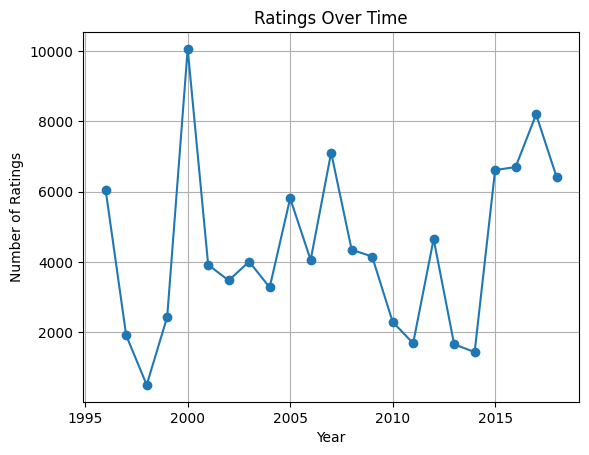

In [45]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'], unit='s') # Convert to datetime objects
dataset['year'] = dataset['timestamp'].dt.year
dataset['month'] = dataset['timestamp'].dt.month

ratings_per_year = dataset['year'].value_counts().sort_index()
print("Number of Ratings per Year:")
print(ratings_per_year)

ratings_per_month_year = dataset.groupby(['year', 'month']).size().unstack(fill_value=0)
print("\nNumber of Ratings per Month and Year:")
print(ratings_per_month_year)

ratings_per_year.plot(kind='line', marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.title("Ratings Over Time")
plt.grid(True)
plt.show()

Genre Popularity Over Time (First few years):
individual_genres  (no genres listed)  Action  Adventure  Animation  Children  \
year                                                                            
1996                                0    1964       1459        357       700   
1997                                0     536        441         79       165   
1998                                0     213        117         13        30   
1999                                0     625        482         88       156   
2000                                0    2950       2193        441       826   

individual_genres  Comedy  Crime  Documentary  Drama  Fantasy  Film-Noir  \
year                                                                       
1996                 2250   1081           17   2518      552          9   
1997                  727    273           12    798      176          9   
1998                  142     89            0    199       29          8   
1999  

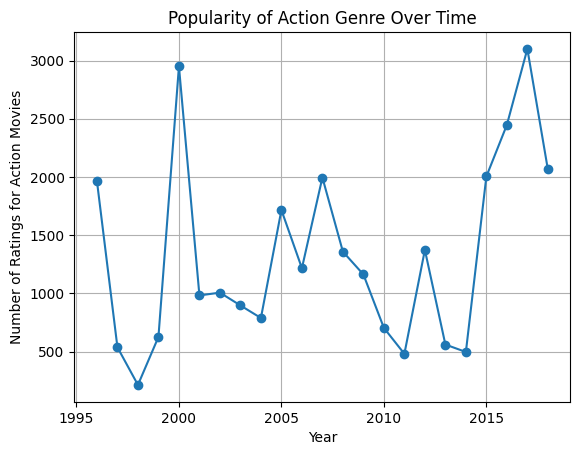

In [ ]:
genre_year = genre_df.groupby(['year', 'individual_genres']).size().unstack(fill_value=0)
print("Genre Popularity Over Time (First few years):")
print(genre_year.head())

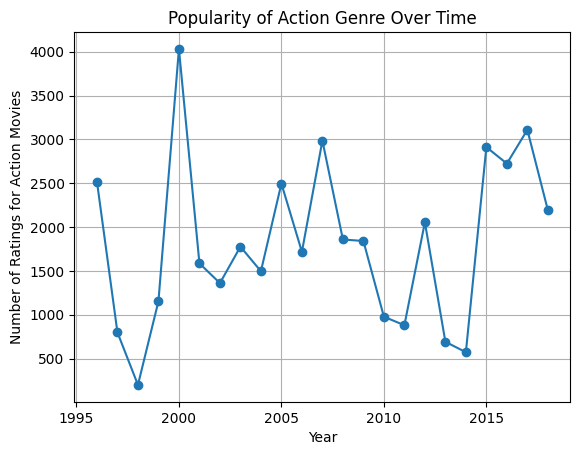

In [52]:
genre_trend = genre_year['Drama'] # Example for 'Action' genre
genre_trend.plot(kind='line', marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Ratings for Action Movies")
plt.title("Popularity of Action Genre Over Time")
plt.grid(True)
plt.show()

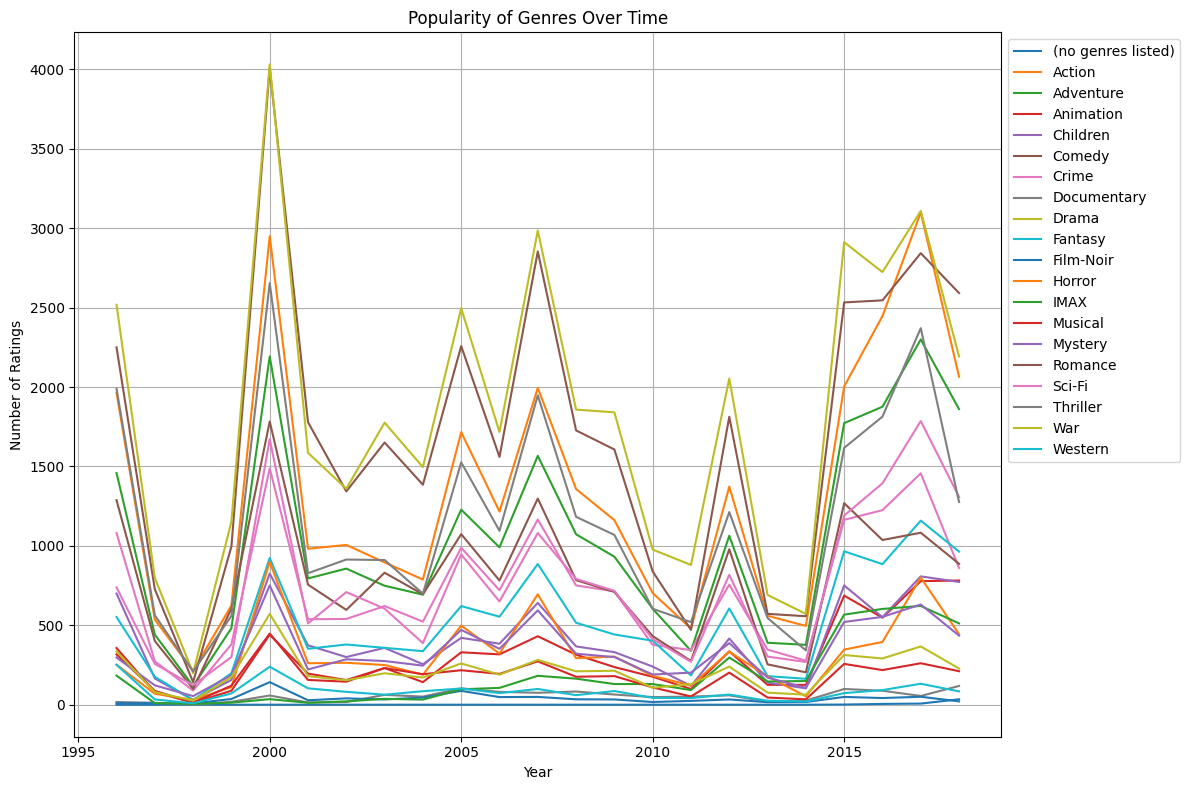

In [53]:
genre_popularity_over_time = genre_df.groupby(['year', 'individual_genres']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
for genre in genre_popularity_over_time.columns:
    plt.plot(genre_popularity_over_time.index, genre_popularity_over_time[genre], label=genre)

plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.title("Popularity of Genres Over Time")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) # Place legend outside the plot
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

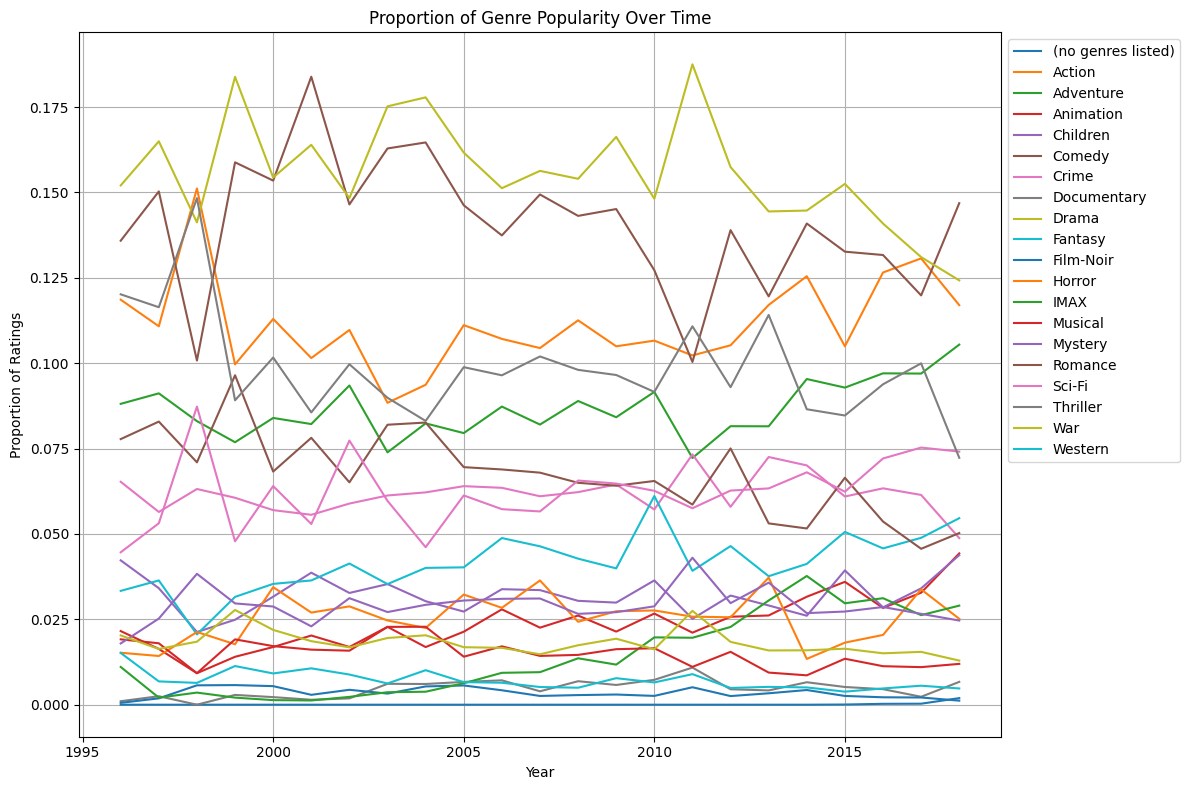

In [55]:
genre_proportion_over_time = genre_popularity_over_time.div(genre_popularity_over_time.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
for genre in genre_proportion_over_time.columns:
    plt.plot(genre_proportion_over_time.index, genre_proportion_over_time[genre], label=genre)

plt.xlabel("Year")
plt.ylabel("Proportion of Ratings")
plt.title("Proportion of Genre Popularity Over Time")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

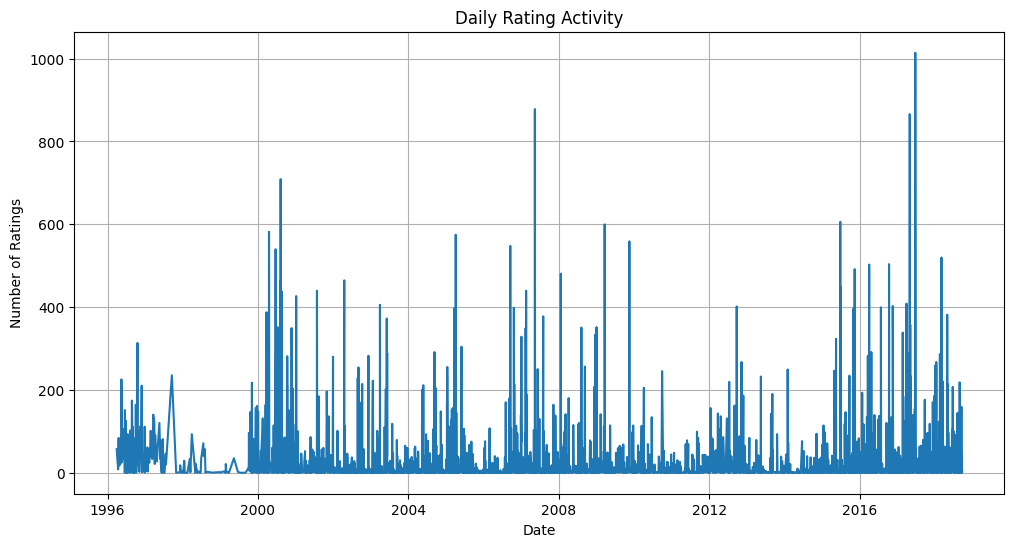

In [56]:
dataset['date'] = dataset['timestamp'].dt.date  # Extract date
ratings_per_date = dataset['date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(ratings_per_date.index, ratings_per_date.values)
plt.xlabel("Date")
plt.ylabel("Number of Ratings")
plt.title("Daily Rating Activity")
plt.grid(True)
plt.show()

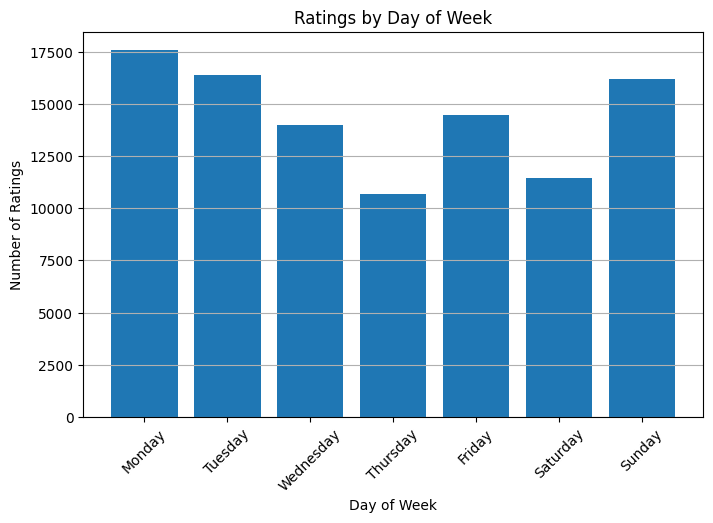

In [57]:
dataset['day_of_week'] = dataset['timestamp'].dt.day_name()
ratings_by_day = dataset['day_of_week'].value_counts()

# To ensure consistent ordering of days:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ratings_by_day = ratings_by_day.reindex(days_order)

plt.figure(figsize=(8, 5))
plt.bar(ratings_by_day.index, ratings_by_day.values)
plt.xlabel("Day of Week")
plt.ylabel("Number of Ratings")
plt.title("Ratings by Day of Week")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y')
plt.show()

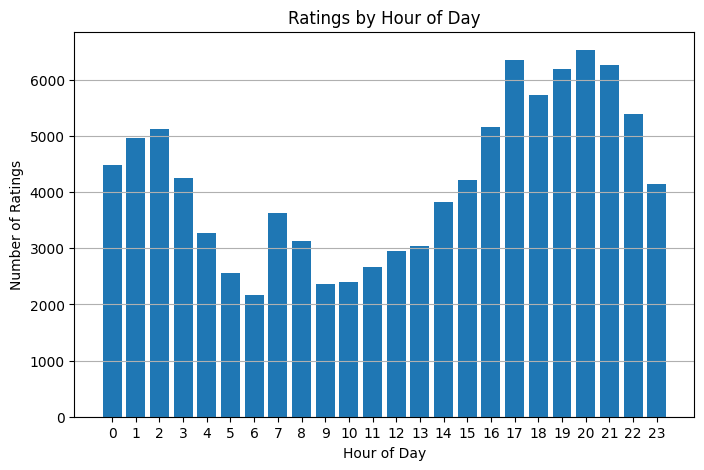

In [58]:
dataset['hour'] = dataset['timestamp'].dt.hour
ratings_by_hour = dataset['hour'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(ratings_by_hour.index, ratings_by_hour.values)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Ratings")
plt.title("Ratings by Hour of Day")
plt.xticks(range(24))  # Ensure all hours are shown
plt.grid(axis='y')
plt.show()

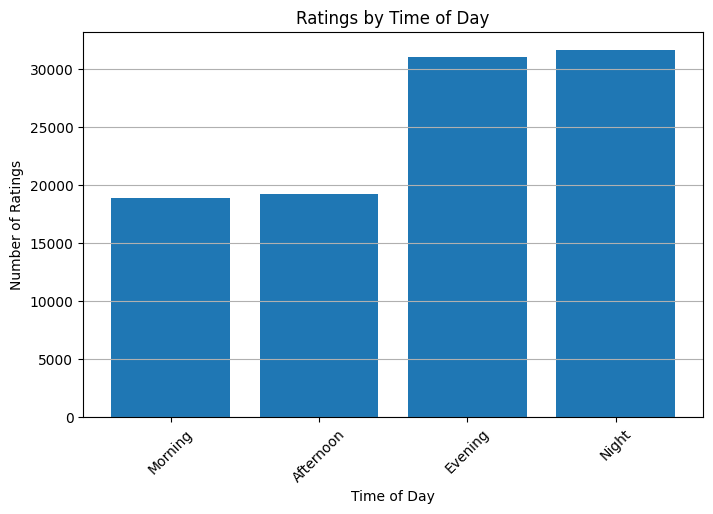

In [59]:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 22:
        return "Evening"
    else:
        return "Night"

dataset['time_of_day'] = dataset['hour'].apply(get_time_of_day)
ratings_by_time_of_day = dataset['time_of_day'].value_counts()

time_of_day_order = ["Morning", "Afternoon", "Evening", "Night"]
ratings_by_time_of_day = ratings_by_time_of_day.reindex(time_of_day_order)

plt.figure(figsize=(8, 5))
plt.bar(ratings_by_time_of_day.index, ratings_by_time_of_day.values)
plt.xlabel("Time of Day")
plt.ylabel("Number of Ratings")
plt.title("Ratings by Time of Day")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

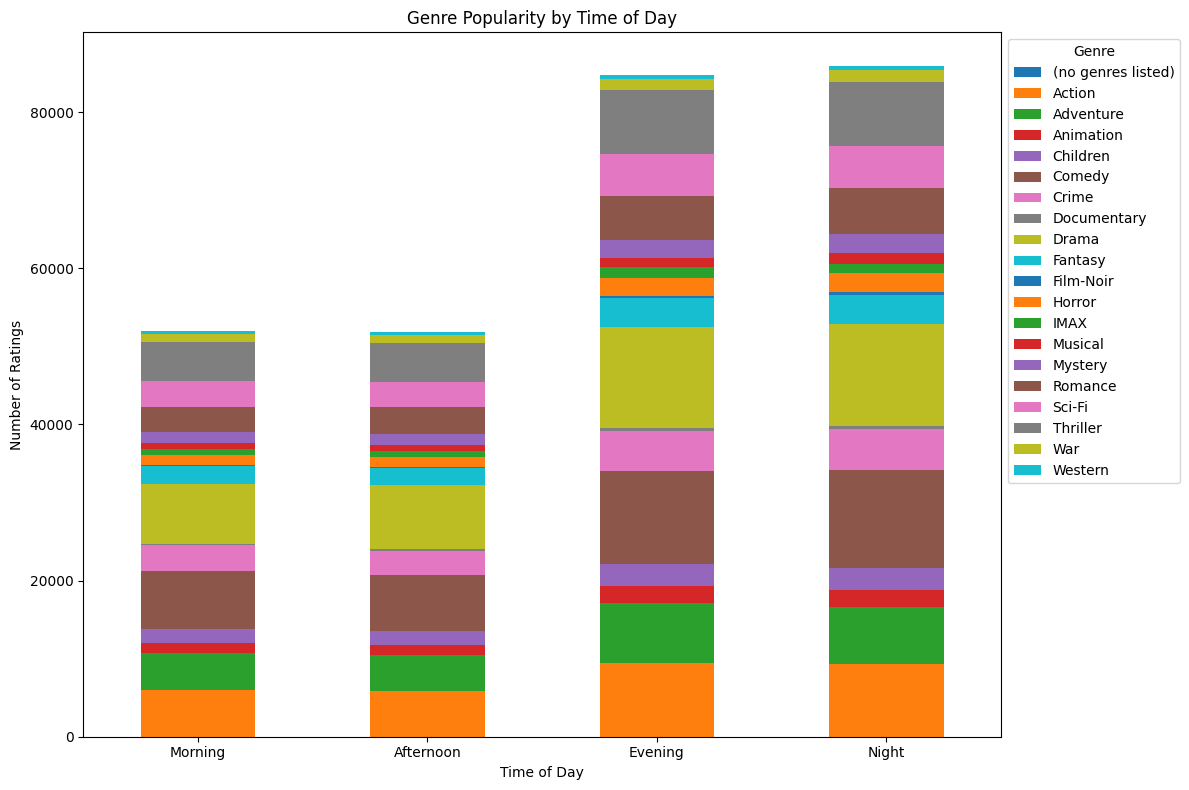

In [60]:
# Assuming your merged DataFrame is called 'dataset' and has 'timestamp' and 'genres' columns

# Convert timestamp to datetime and extract hour
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'], unit='s')
dataset['hour'] = dataset['timestamp'].dt.hour

# Define time of day categories
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 22:
        return "Evening"
    else:
        return "Night"

dataset['time_of_day'] = dataset['hour'].apply(get_time_of_day)

# Split the 'genres' column into individual genres
dataset['individual_genres'] = dataset['genres'].str.split('|')

# Create a new DataFrame with one row per genre for each movie
genre_time_of_day = dataset.explode('individual_genres')

# Group by 'time_of_day' and 'individual_genres' and count the number of ratings
genre_time_of_day_counts = genre_time_of_day.groupby(['time_of_day', 'individual_genres']).size().unstack(fill_value=0)

# Define the order of time of day categories
time_of_day_order = ["Morning", "Afternoon", "Evening", "Night"]
genre_time_of_day_counts = genre_time_of_day_counts.reindex(time_of_day_order)

# Plotting
genre_time_of_day_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel("Time of Day")
plt.ylabel("Number of Ratings")
plt.title("Genre Popularity by Time of Day")
plt.xticks(rotation=0)
plt.legend(title="Genre", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Moinul\AppData\Local\Temp\ipykernel_14144\1052828578.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_ratings['hour'] = recent_ratings['timestamp'].dt.hour
C:\Users\Moinul\AppData\Local\Temp\ipykernel_14144\1052828578.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_ratings['time_of_day'] = recent_ratings['hour'].apply(get_time_of_day)
C:\Users\Moinul\AppData\Local\Temp\ipykernel_14144\1052828578.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

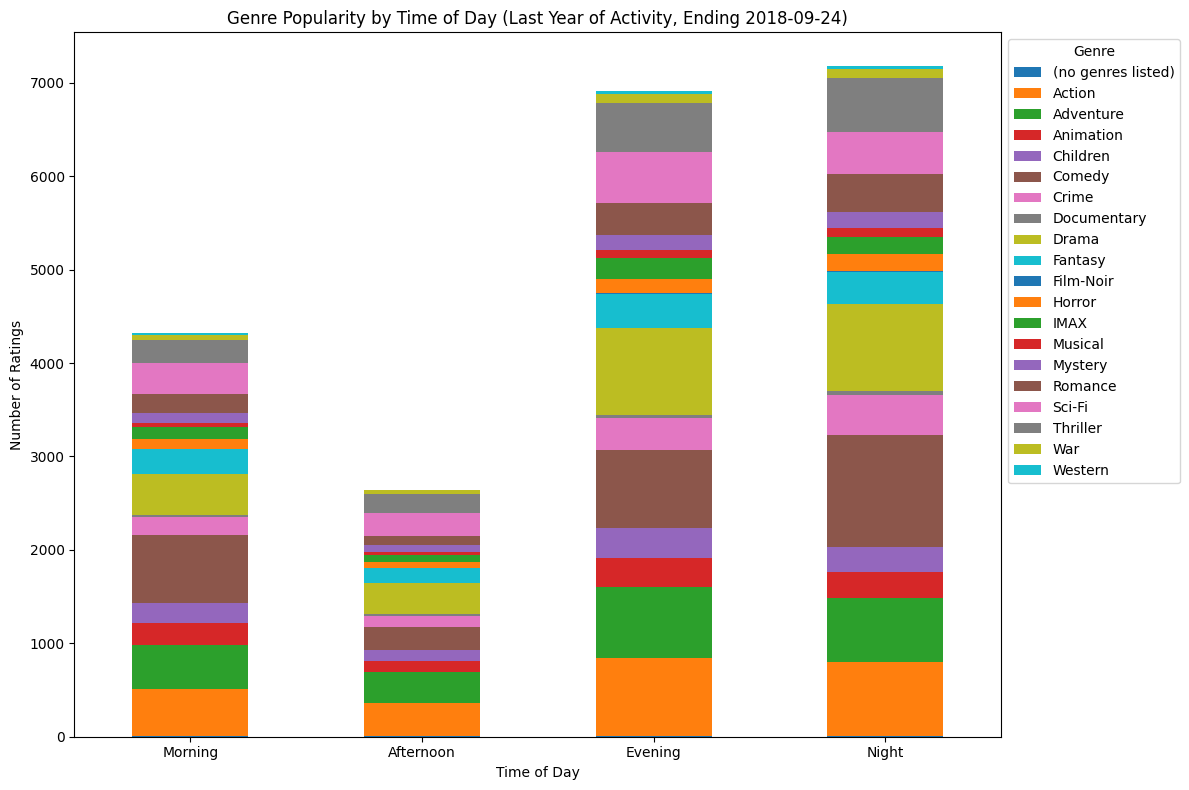

In [62]:
# Convert timestamp to datetime
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'], unit='s')

# Find the latest timestamp in the dataset
latest_timestamp = dataset['timestamp'].max()

# Calculate the timestamp one year prior to the latest timestamp
one_year_before_latest = latest_timestamp - timedelta(days=365)

# Filter the dataset for ratings within the last year of activity
recent_ratings = dataset[dataset['timestamp'] >= one_year_before_latest]

# Extract hour and time of day for the recent ratings
recent_ratings['hour'] = recent_ratings['timestamp'].dt.hour

def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 22:
        return "Evening"
    else:
        return "Night"

recent_ratings['time_of_day'] = recent_ratings['hour'].apply(get_time_of_day)

# Split the 'genres' column into individual genres for the recent ratings
recent_ratings['individual_genres'] = recent_ratings['genres'].str.split('|')
recent_genre_time_of_day = recent_ratings.explode('individual_genres')

# Group by 'time_of_day' and 'individual_genres' and count the number of ratings
recent_genre_time_of_day_counts = recent_genre_time_of_day.groupby(['time_of_day', 'individual_genres']).size().unstack(fill_value=0)

# Define the order of time of day categories
time_of_day_order = ["Morning", "Afternoon", "Evening", "Night"]
recent_genre_time_of_day_counts = recent_genre_time_of_day_counts.reindex(time_of_day_order)

# Plotting
recent_genre_time_of_day_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel("Time of Day")
plt.ylabel("Number of Ratings")
plt.title(f"Genre Popularity by Time of Day (Last Year of Activity, Ending {latest_timestamp.strftime('%Y-%m-%d')})")
plt.xticks(rotation=0)
plt.legend(title="Genre", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


Temporal Genre Preferences for User 50:
            timestamp     genre  avg_recent_rating
0 2017-07-20 18:01:36    Comedy                4.0
1 2017-07-20 18:01:36     Crime                4.0
2 2017-07-20 18:01:36     Drama                4.0
3 2017-07-20 18:01:36  Thriller                4.0
4 2017-07-20 18:01:36    Comedy                4.0


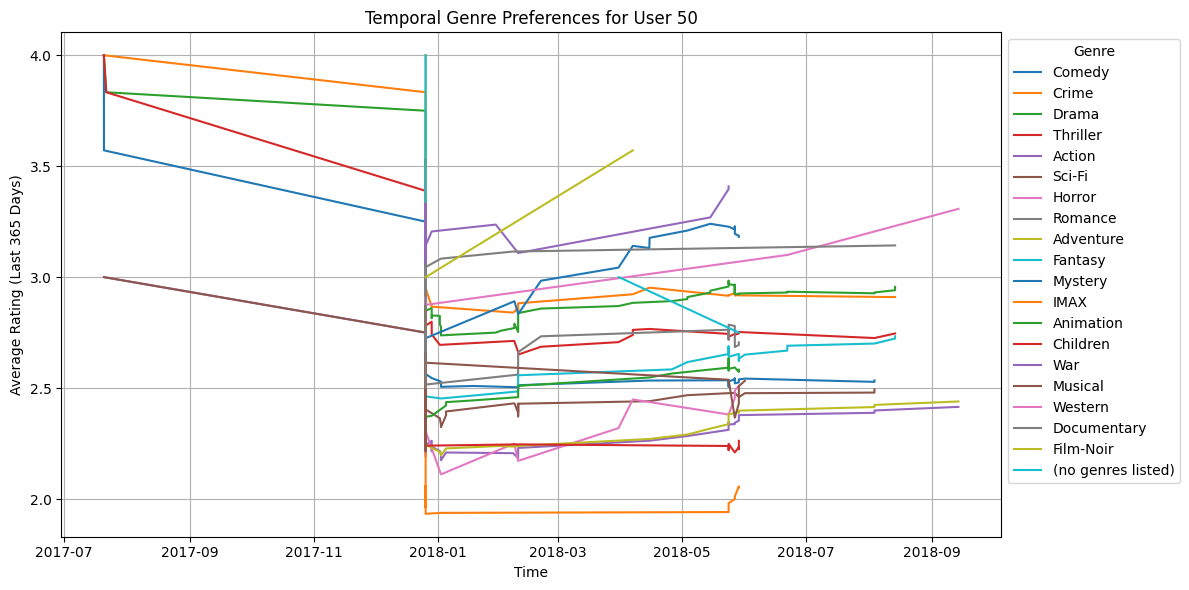

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

def infer_temporal_genre_preference(user_id, dataset, time_window=90):
    """
    Infers temporal genre preferences for a given user based on their rating history.

    Args:
        user_id (int): The ID of the user to analyze.
        dataset (pd.DataFrame): The DataFrame containing user ratings with columns
                                 'userId', 'timestamp', 'genres', and 'rating'.
        time_window (int): The time window in days to consider for calculating
                           recent average ratings.

    Returns:
        pd.DataFrame: A DataFrame with columns 'timestamp', 'genre', and 'avg_recent_rating',
                      showing how the average rating for each genre evolves over time for the user.
                      Returns an empty DataFrame if the user has no ratings.
    """
    user_data = dataset[dataset['userId'] == user_id].sort_values(by='timestamp').copy()
    if user_data.empty:
        return pd.DataFrame(columns=['timestamp', 'genre', 'avg_recent_rating'])

    user_data['timestamp'] = pd.to_datetime(user_data['timestamp'], unit='s')
    temporal_genre_data = []

    for index, row in user_data.iterrows():
        rating_time = row['timestamp']
        genres = row['genres'].split('|')
        rating = row['rating']

        for genre in genres:
            # Consider ratings for this genre within the time window ending at the current rating time
            start_time = rating_time - timedelta(days=time_window)
            recent_genre_ratings = user_data[
                (user_data['timestamp'] >= start_time) &
                (user_data['timestamp'] <= rating_time) &
                (user_data['genres'].str.contains(genre, regex=False)) # Ensure it's exactly this genre
            ]['rating'].tolist()

            if recent_genre_ratings:
                avg_recent_rating = sum(recent_genre_ratings) / len(recent_genre_ratings)
                temporal_genre_data.append({'timestamp': rating_time, 'genre': genre, 'avg_recent_rating': avg_recent_rating})

    return pd.DataFrame(temporal_genre_data)

def visualize_temporal_genre_preference(temporal_genre_df, user_id):
    """
    Visualizes the temporal genre preferences for a user.

    Args:
        temporal_genre_df (pd.DataFrame): The DataFrame output by infer_temporal_genre_preference.
        user_id (int): The ID of the user being visualized.
    """
    if temporal_genre_df.empty:
        print(f"No rating data available for user {user_id} to visualize temporal genre preferences.")
        return

    plt.figure(figsize=(12, 6))
    for genre in temporal_genre_df['genre'].unique():
        genre_data = temporal_genre_df[temporal_genre_df['genre'] == genre].sort_values(by='timestamp')
        plt.plot(genre_data['timestamp'], genre_data['avg_recent_rating'], label=genre)

    plt.xlabel("Time")
    plt.ylabel(f"Average Rating (Last {time_window} Days)")
    plt.title(f"Temporal Genre Preferences for User {user_id}")
    plt.legend(title="Genre", bbox_to_anchor=(1, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Main Execution ---
if __name__ == "__main__":
    # Assume you have already loaded your 'dataset' DataFrame
    # If not, uncomment and run the following lines to load your data:
    # movie_info_path = r"E:\1_RecSys\Recommender\data\ml-latest-small\movies.csv"
    # ratings_path = r"E:\1_RecSys\Recommender\data\ml-latest-small\ratings.csv"
    # movies_df = pd.read_csv(movie_info_path)
    # ratings_df = pd.read_csv(ratings_path)
    # dataset = pd.merge(ratings_df, movies_df, on='movieId', how='inner')

    # --- Prepare the dataset for genre analysis (if not already done) ---
    if 'individual_genres' not in dataset.columns:
        dataset['individual_genres'] = dataset['genres'].str.split('|')
        dataset_exploded = dataset.explode('individual_genres')
    else:
        dataset_exploded = dataset.explode('individual_genres')

    # --- Choose a user ID to analyze ---
    user_id_to_analyze = 50  # Replace with the desired user ID

    # --- Set the time window for considering recent ratings (in days) ---
    time_window = 365

    # --- Infer temporal genre preferences ---
    temporal_genre_preferences_df = infer_temporal_genre_preference(user_id_to_analyze, dataset_exploded, time_window)
    print(f"\nTemporal Genre Preferences for User {user_id_to_analyze}:")
    print(temporal_genre_preferences_df.head())

    # --- Visualize the results ---
    visualize_temporal_genre_preference(temporal_genre_preferences_df, user_id_to_analyze)